# Week 9 - Power iteration

First, a convenience function to generate Wilkinson matrices. Wilkinson matrices are tridiagonal matrices with pairs of close eigenvalues.

In [1]:
import numpy as np

def wilkinson(n):
    '''
    Generate the Wilkinson matrix of dimension 2n+1.
    '''
    D = np.abs(np.diag(range(-n, n+1))) \
        + np.diag(np.ones(2*n), 1) \
        + np.diag(np.ones(2*n), -1)
    
    return D

Now, we set up a matrix, and use `np.linalg.eigvalsh()` to compute its eigenvalues, for reference.

In [2]:
import numpy as np

# Set up a symmetric matrix
n = 100
mat_type = 'random'

if mat_type == 'random':
    # Random matrix - eigenvalues are typically well-separated
    B = np.random.rand(n, n)
    A = B.T @ B
    
elif mat_type == 'wilkinson':
    # Wilkinson matrix - eigenvalues are pairs close together
    A = wilkinson(n)
    
    # Change n to 2n+1 for Wilkinson matrix
    n = 2*n + 1


# Compute the eigenvalues for reference
spec = np.abs(np.linalg.eigvalsh(A)[::-1])

print(f'The two largest eigenvalues (in absolute value) are {spec[0]:16.16f} and {spec[1]:16.16f}.')

The two largest eigenvalues (in absolute value) are 2496.0478927343629039 and 31.8382186941402168.


We apply Algorithm PI (Power Iteration) to find the largest eigenvalue of $A$:

In [9]:
def PI(A,k,  k_max):
    '''
    Power iteration algorithms. Runs for k_max iterations,
    returns the magnitude of the largest eigenvalue of A,
    and the corresponding eigenvector.
    '''
    # Initial guess
    n = A.shape[0]
    zk = k
    zk = zk / np.linalg.norm(zk, 2)
    
    # Power iteration loop
    for k in range(k_max):
        zk = A @ zk
        zk = zk / np.linalg.norm(zk, 2)
        
    # Compute eigenvalue as Rayleigh quotient
    lambda_k = zk.T @ A @ zk
    
    return lambda_k, zk


# Maximum number of iterations
k_max_vals = [1, 2, 3, 4, 5, 10, 50]

for k_max in k_max_vals:
    
    # Power iteration
    lambda_k, zk = PI(A, k_max)
    
    # Compute relative error
    err = np.abs(lambda_k - spec[0]) / spec[0]
    print(f'Relative error after {k_max:2d} iteration(s): {err:.5g}')

TypeError: PI() missing 1 required positional argument: 'k_max'

In [10]:
def PI(A,k,  k_max):
    '''
    Power iteration algorithms. Runs for k_max iterations,
    returns the magnitude of the largest eigenvalue of A,
    and the corresponding eigenvector.
    '''
    # Initial guess
    n = A.shape[0]
    zk = k
    zk = zk / np.linalg.norm(zk, 2)
    
    # Power iteration loop
    for k in range(k_max):
        zk = A @ zk
        zk = zk / np.linalg.norm(zk, 2)
        
    # Compute eigenvalue as Rayleigh quotient
    lambda_k = zk.T @ A @ zk
    
    return lambda_k, zk

In [16]:
A = np.array([[7,2],[2,3]])
k = (1/np.sqrt(2))*np.array([1,1])
PI(A,k, 5)

(7.828424506428318, array([0.92361897, 0.38331189]))

### A visualisation of power iteration

<IPython.core.display.Javascript object>


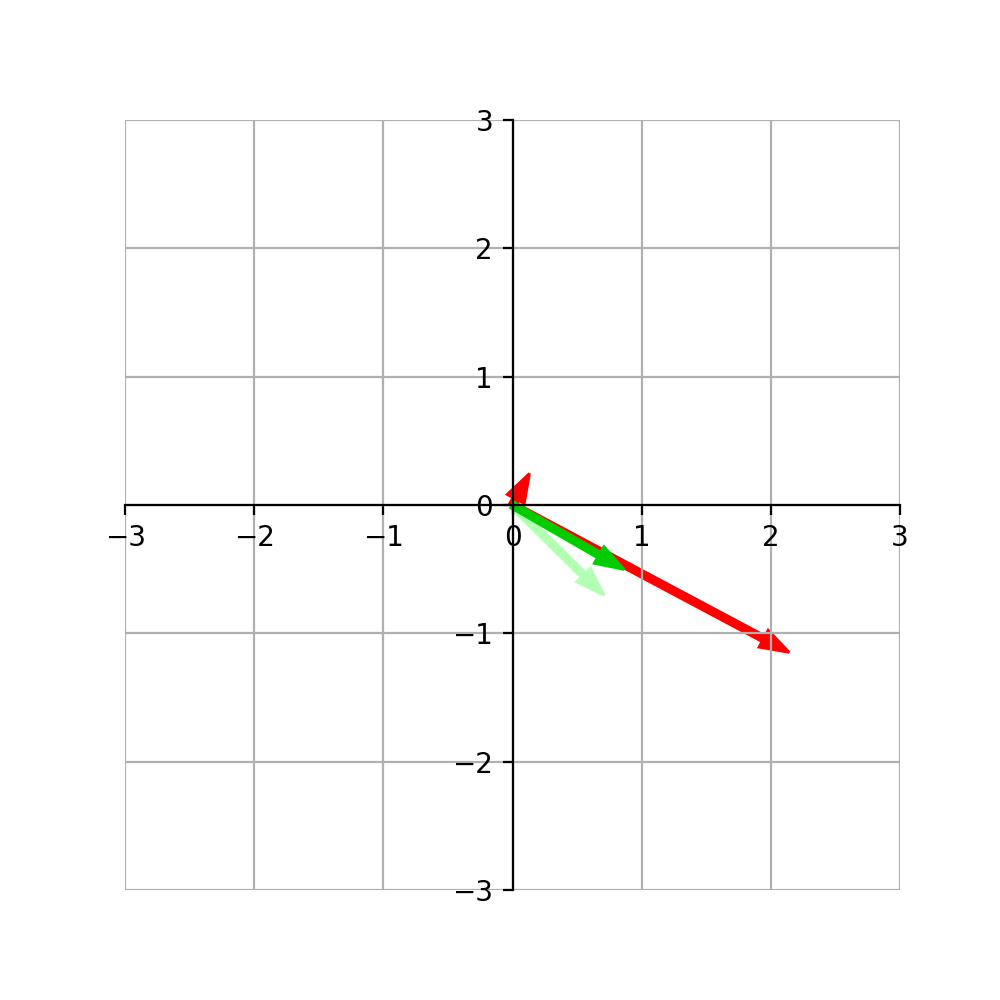

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook

# Create a 2x2 symmetric matrix with orthogonal eigenvectors
B = 3*np.random.rand(2, 2) - 1.5
A = B.T @ B
lambd, v = np.linalg.eig(A)

# Create a figure
xmin = -3
xmax = 3
ymin = -3
ymax = 3
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(range(xmin, xmax+1))
ax.set_yticks(range(ymin, ymax+1))

plt.grid()

# Draw the eigenvectors
for i in range(2):
    plt.arrow(0, 0, lambd[i]*v[0, i], lambd[i]*v[1, i],
              length_includes_head=True, width=0.05, color=[1, 0, 0])


# Start with a random initial guess
zk = 2 * np.random.rand(2) - 1
zk = zk / np.linalg.norm(zk)

# Draw the vector
zk_arrow = plt.arrow(0, 0, zk[0], zk[1], length_includes_head=True, width=0.05, color=[0, 0.8, 0])
plt.show()

In [5]:
# Power iteration (run cell once to advance 1 iteration)
zk = A @ zk
zk = zk / np.linalg.norm(zk, 2)

c = [min(i+0.7, 1.) for i in zk_arrow.get_fc()]
zk_arrow.set_color(c)
zk_arrow = plt.arrow(0, 0, zk[0], zk[1], length_includes_head=True, width=0.05, color=[0, 0.8, 0])